In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [8]:
# Assuming the JSON data is in a file called 'data.json'
with open('../results/scenario_1/preprocessed_all_results_shallow_models.json', 'r') as f:
    data = json.load(f)

rows = []

# Iterate over the JSON data and append the values to the 'rows' list
for key, values in data.items():
    for value in values:
        row = value.copy()
        row['file_key'] = key
        rows.append(row)

# Create a dataframe from the 'rows' list
df = pd.DataFrame(rows)


In [9]:
def stringify_list(x):
    if isinstance(x, list):
        return ','.join(map(str, x))
    return None

# Convert the list to a string
df['aggregate'] = df['aggregate'].apply(stringify_list)

# Convert the 'aggregate' column into a category
df['aggregate'] = df['aggregate'].astype('category')


# Normalize the dictionaries in the 'hyperparameters' column
expanded_hyperparameters = pd.json_normalize(df['hyperparameters'])

# Concatenate the original dataframe with the expanded hyperparameters dataframe
result_df = pd.concat([df.drop('hyperparameters', axis=1), expanded_hyperparameters], axis=1)



result_df.head()

,model,aggregate,average_rmse_arousal,average_rmse_valence,file_pair,file_key,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features
0,RandomForestRegressor,enlarged,0.054061,0.212242,../data/raw/scenario_1/train/annotations\sub_1...,../data/raw/scenario_1/train/annotations\sub_1...,50,10.0,2,1,auto
1,RandomForestRegressor,enlarged,0.051959,0.417133,../data/raw/scenario_1/train/annotations\sub_1...,../data/raw/scenario_1/train/annotations\sub_1...,50,10.0,2,1,sqrt
2,RandomForestRegressor,enlarged,0.054827,0.219970,../data/raw/scenario_1/train/annotations\sub_1...,../data/raw/scenario_1/train/annotations\sub_1...,50,10.0,2,2,auto
3,RandomForestRegressor,enlarged,0.046770,0.392021,../data/raw/scenario_1/train/annotations\sub_1...,../data/raw/scenario_1/train/annotations\sub_1...,50,10.0,2,2,sqrt
4,RandomForestRegressor,enlarged,0.054225,0.229760,../data/raw/scenario_1/train/annotations\sub_1...,../data/raw/scenario_1/train/annotations\sub_1...,50,10.0,5,1,auto


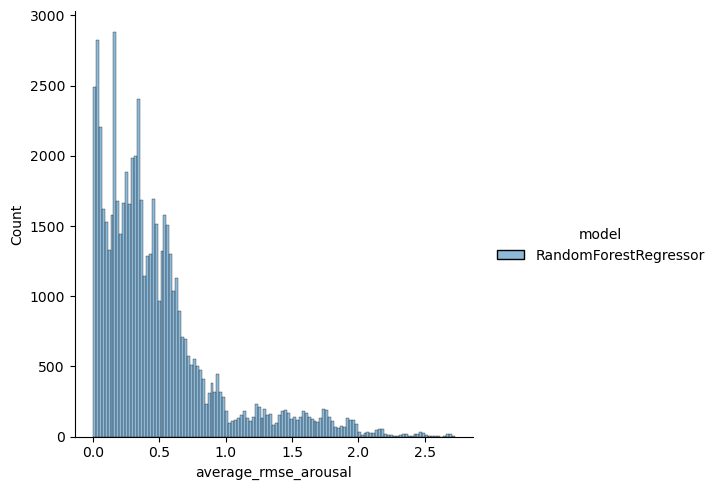

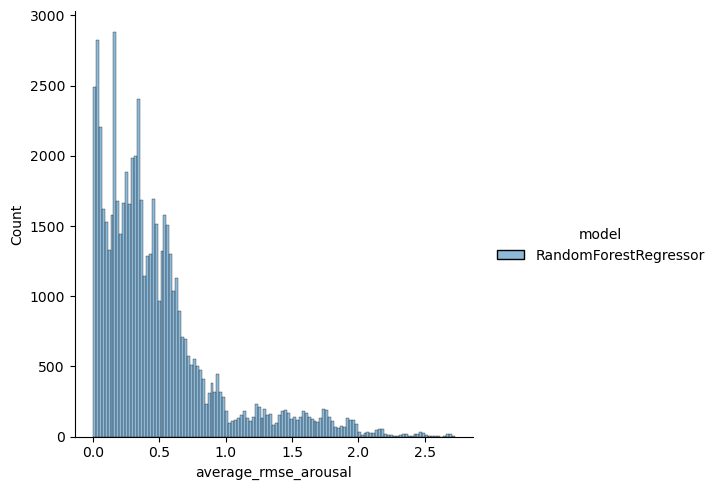

In [6]:
sns.displot(result_df, x="average_rmse_arousal", hue="model",fill=True)
sns.displot(result_df, x="average_rmse_arousal", hue="model",fill=True)
plt.show()


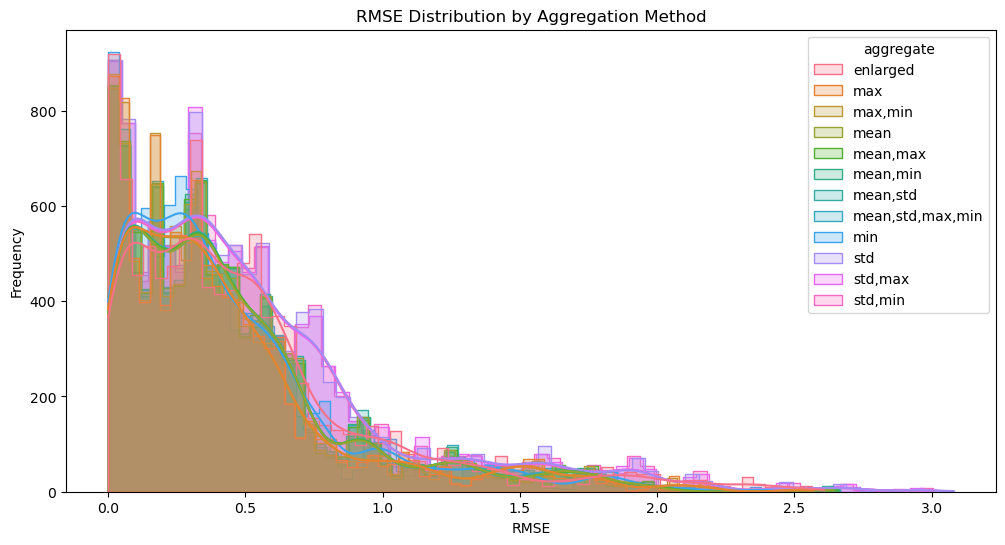

In [10]:
# Create a new DataFrame with the 'aggregate' column and the average RMSE columns
df_rmse = df[['aggregate', 'average_rmse_arousal', 'average_rmse_valence']]

# Melt the DataFrame to have one row per RMSE value, including a new column 'type' to identify the RMSE type
df_rmse = df_rmse.melt(id_vars=['aggregate'], var_name='type', value_name='rmse')

# Create a histogram for the RMSE distribution for each aggregation method
plt.figure(figsize=(12, 6))
sns.histplot(data=df_rmse, x='rmse', hue='aggregate', kde=True, common_bins=False, element='step')

# Set the title and labels
plt.title('RMSE Distribution by Aggregation Method')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# Show the plot
plt.show()


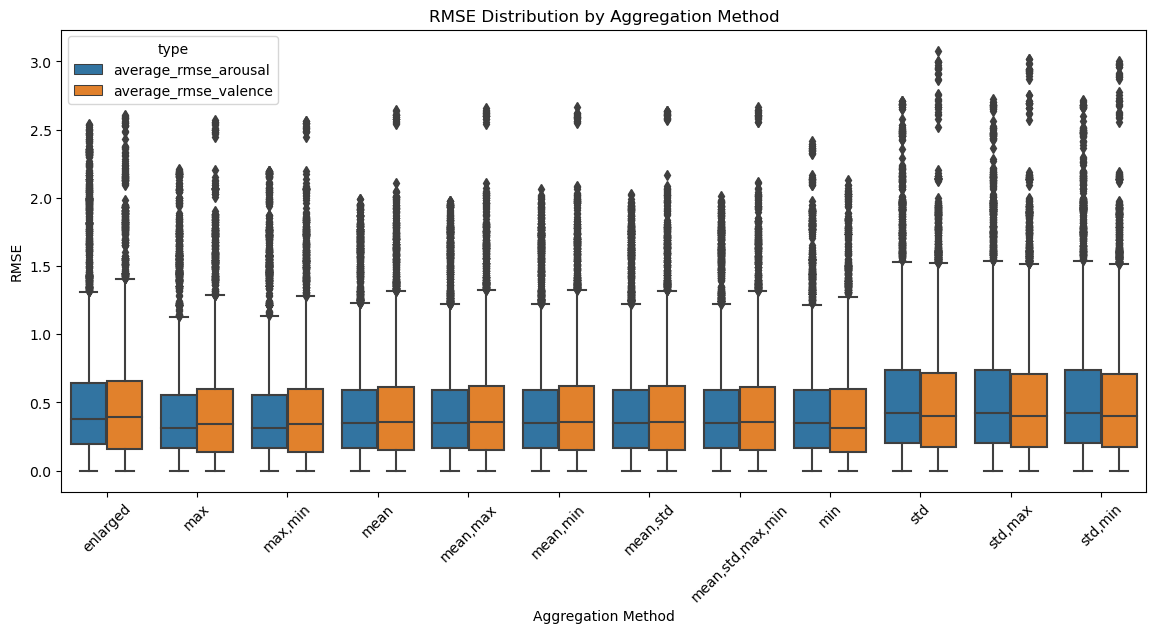

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the RMSE distribution for each aggregation method
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_rmse, x='aggregate', y='rmse', hue='type')

# Set the title and labels
plt.title('RMSE Distribution by Aggregation Method')
plt.xlabel('Aggregation Method')
plt.ylabel('RMSE')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


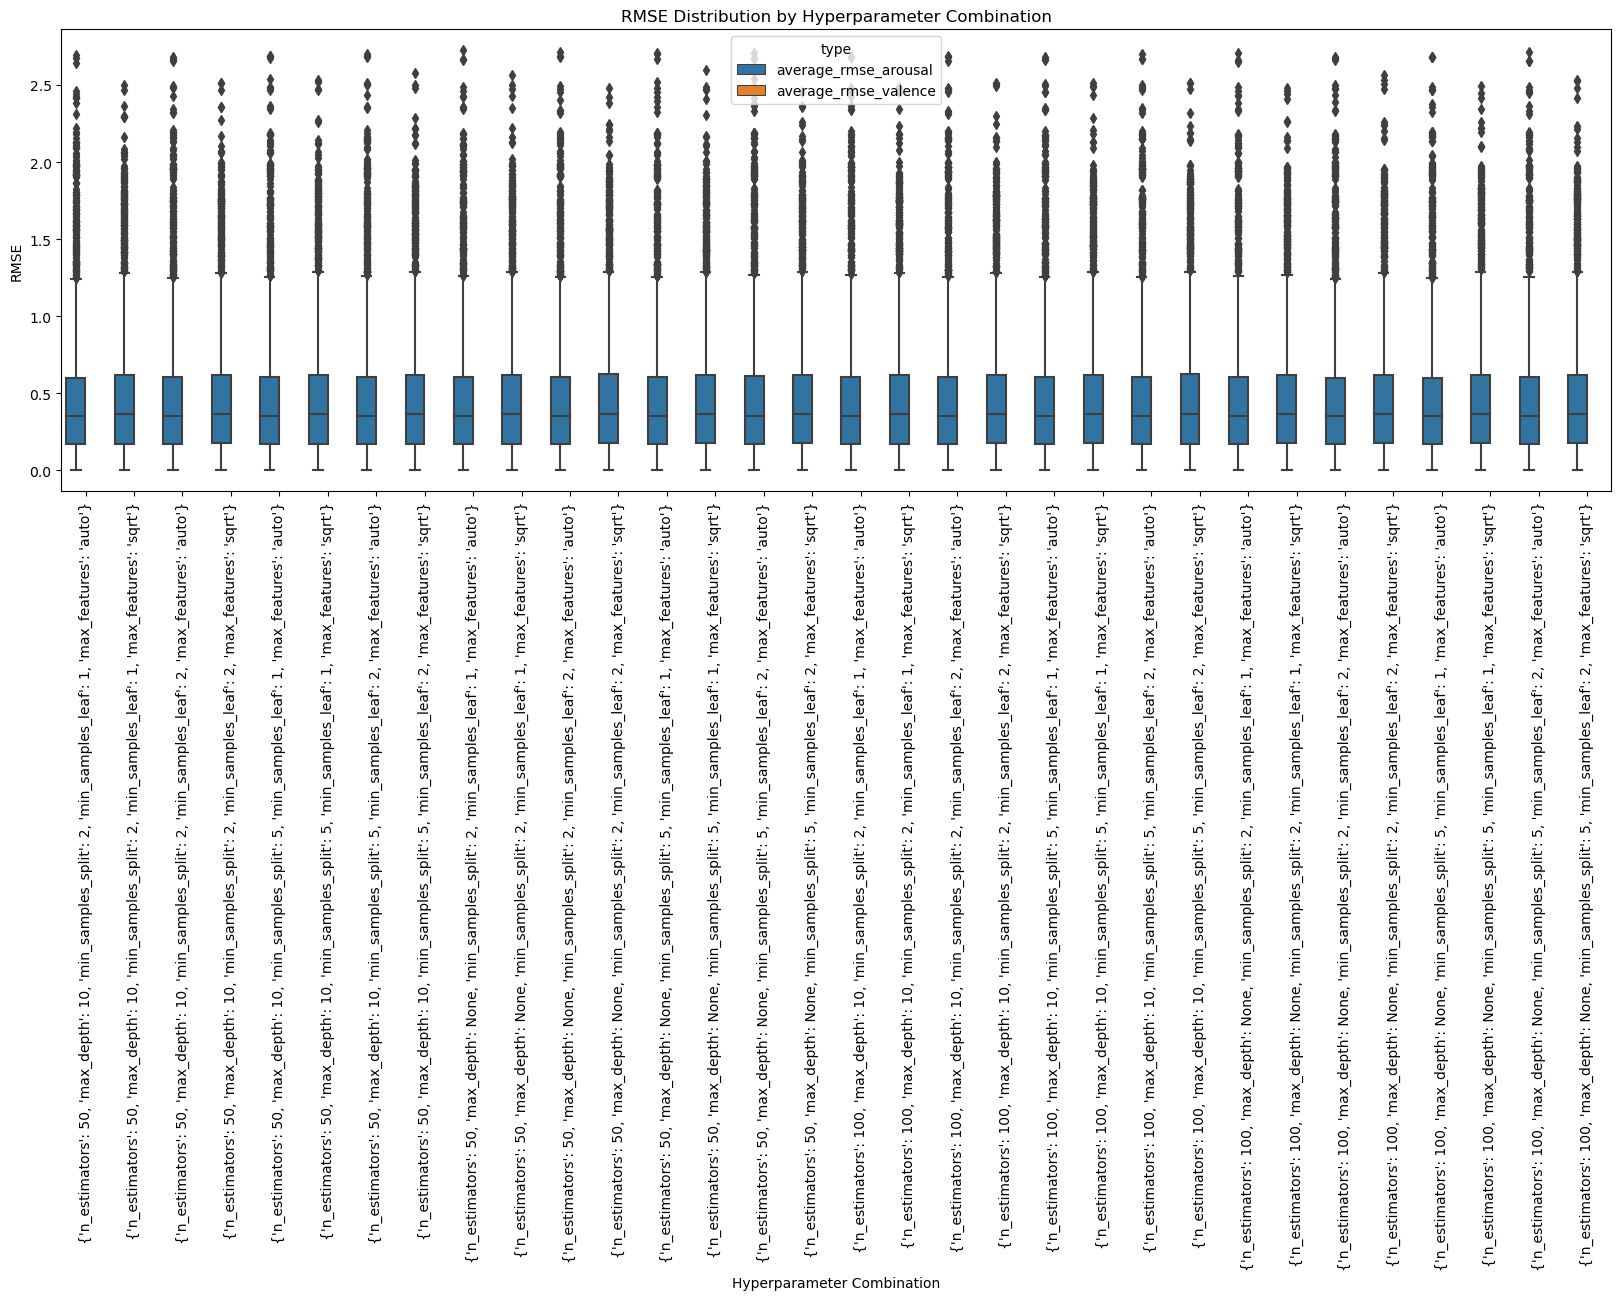

In [12]:
# Create a new column with a string representation of the hyperparameters dictionary
df_rmse['hyperparameters_str'] = df['hyperparameters'].apply(lambda x: str(x))

# Create a box plot for the RMSE distribution for each hyperparameter combination
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_rmse, x='hyperparameters_str', y='rmse', hue='type')

# Set the title and labels
plt.title('RMSE Distribution by Hyperparameter Combination')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('RMSE')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [13]:
# Group by hyperparameters and calculate aggregated statistics
hyperparameters_df = df_rmse.groupby('hyperparameters_str').describe()

# Group by aggregate methods and calculate aggregated statistics
aggregate_df = df_rmse.groupby('aggregate').describe()

# Sort the hyperparameters DataFrame by mean
hyperparameters_df_sorted = hyperparameters_df.sort_values(by=('rmse', 'mean'))

# Sort the aggregate methods DataFrame by mean
aggregate_df_sorted = aggregate_df.sort_values(by=('rmse', 'mean'))

# Display the sorted DataFrames
display(hyperparameters_df_sorted)
display(aggregate_df_sorted)



rmse            \
                                                     count      mean   
hyperparameters_str                                                    
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.478477   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.478477   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.478483   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.479034   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.479059   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.479242   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.479364   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.479367   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.479383   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.479391   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.479443   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.479561   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.479606   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.479700   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.479995   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.480202   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.481867   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.482692   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.483316   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.483484   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.483679   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.483976   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.484017   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.484191   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.484199   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.484206   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1968.0  0.484312   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.484403   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1968.0  0.484424   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.484556   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1968.0  0.484834   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1968.0  0.485686   

                                                                             \
                                                         std  min       25%   
hyperparameters_str                                                           
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.450740  0.0  0.170198   
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.450741  0.0  0.170107   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.450689  0.0  0.169615   
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.451791  0.0  0.170109   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.451265  0.0  0.170414   
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.451492  0.0  0.170458   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.451593  0.0  0.169445   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.451792  0.0  0.170626   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.451955  0.0  0.170772   
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.451644  0.0  0.170572   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.451522  0.0  0.169506   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.451423  0.0  0.170404   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.451635  0.0  0.170111   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.451795  0.0  0.170923   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.452571  0.0  0.170359   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.452555  0.0  0.169831   
{'n_estimators': 100, 'max_depth

rmse                                               \
                    count      mean       std  min       25%       50%   
aggregate                                                                
max,min           10496.0  0.441186  0.427045  0.0  0.153403  0.326757   
max               10496.0  0.441508  0.427139  0.0  0.153959  0.326231   
min               10496.0  0.441727  0.410043  0.0  0.150476  0.331868   
mean              10496.0  0.455507  0.412153  0.0  0.164052  0.351659   
mean,max          10496.0  0.455529  0.412949  0.0  0.164086  0.351612   
mean,std,max,min  10496.0  0.455607  0.412571  0.0  0.164131  0.351387   
mean,std          10496.0  0.455850  0.412844  0.0  0.164315  0.351787   
mean,min          10496.0  0.455990  0.412528  0.0  0.164383  0.352219   
enlarged          10496.0  0.509045  0.473143  0.0  0.176933  0.390573   
std,max           10496.0  0.535227  0.491492  0.0  0.184755  0.409705   
std               10496.0  0.535413  0.491710  0.0  0.184684  0.408915   
std,min           10496.0  0.535448  0.491906  0.0  0.185463  0.409853   

                                      
                       75%       max  
aggregate                             
max,min           0.569198  2.561321  
max               0.569165  2.570324  
min               0.592175  2.419597  
mean              0.599033  2.642772  
mean,max          0.600534  2.657060  
mean,std,max,min  0.600691  2.667247  
mean,std          0.599278  2.640089  
mean,min          0.601513  2.663350  
enlarged          0.651747  2.606609  
std,max           0.722795  3.016954  
std               0.720259  3.079730  
std,min           0.719276  3.004242